In [1]:
import pandas as pd
import os

# Set the working directory
os.chdir(r"G:\uni class sessions\GEE\\babolsar")


In [2]:
import pandas as pd

pd.options.display.float_format = '{:.6f}'.format

# Load the data for 1990
df1_90 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neigh_UHI_Stat_sari90.csv')[['hotspotArea', 'meanLST', 'meanUHI', 'OBJECTID']]
df2_90 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_UHI_Stati_Exte_sari90.csv')[['UHI_median', 'mean_local_morans_i', 'OBJECTID']]
df3_90 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_LST_Percent_sari90.csv')[['LST_Median', 'OBJECTID']]
df4_90 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_Extended_Stat_sari90.csv')[['UHI_Intensity_Mean', 'LST_Hotspots_Percentage', 'Morans_I_Global', 'Morans_I_Hotspots_Percentage', 'OBJECTID']]
df5_90 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_LST_Stat_sari90.csv')[['emissivity', 'Id', 'OBJECTID', '.geo']]
df6_90 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\LcAreaStats_bblsar90.csv')[['0', '1', '2', '3', '4', '5', 'AREA', 'OBJECTID']]

# Load the data for 2017
df1_17 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighborhood_UHI_Statistics_sari17new.csv')[['hotspotArea', 'meanLST', 'meanUHI', 'OBJECTID']]
df2_17 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_UHI_Statist_Exte_sari17.csv')[['UHI_median', 'mean_local_morans_i', 'OBJECTID']]
df3_17 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_LST_Percent_sari17.csv')[['LST_Median', 'OBJECTID']]
df4_17 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_Exten_Statist_sari17.csv')[['UHI_Intensity_Mean', 'LST_Hotspots_Percentage', 'Morans_I_Global', 'Morans_I_Hotspots_Percentage', 'OBJECTID']]
df5_17 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\Neighb_LST_Statistics_sari17.csv')[['emissivity', 'Id', 'OBJECTID', '.geo']]
df6_17 = pd.read_csv(r'G:\uni class sessions\GEE\babolsar\LcAreaStats_bblsar17.csv')[['0', '1', '2', '3', '4', '5', 'AREA', 'OBJECTID']]

# Merge the datasets for 1990 based on 'name'
df_90 = df1_90.merge(df2_90, on='OBJECTID').merge(df3_90, on='OBJECTID').merge(df4_90, on='OBJECTID').merge(df5_90, on='OBJECTID').merge(df6_90, on='OBJECTID')

# Merge the datasets for 2017 based on 'name'
df_17 = df1_17.merge(df2_17, on='OBJECTID').merge(df3_17, on='OBJECTID').merge(df4_17, on='OBJECTID').merge(df5_17, on='OBJECTID').merge(df6_17, on='OBJECTID')

# Compute descriptive statistics for 1990
desc_stats_90 = df_90.describe()

# Compute descriptive statistics for 2017
desc_stats_17 = df_17.describe()

# Compare the statistics
comparison = desc_stats_90.compare(desc_stats_17)

# Display the comparison
print(comparison)


     hotspotArea              meanLST             meanUHI            \
            self      other      self     other      self     other   
mean  110.338873  98.558357 43.983001 47.412222 -0.076391 -0.078541   
std    58.144363  57.172448  3.638820  1.623141  3.638820  1.623141   
min    12.000000  23.180392 35.682107 43.591451 -8.377285 -3.899312   
25%    67.566667  59.464706 40.942965 46.514327 -3.116427 -0.976436   
50%    98.509804  81.972549 44.186594 47.387846  0.127202 -0.102916   
75%   142.307843 119.431373 47.069178 48.307828  3.009786  0.817066   
max   252.501961 270.376471 49.221620 51.318831  5.162228  3.828068   

     UHI_median           mean_local_morans_i           ...             1  \
           self     other                self    other  ...          self   
mean   4.322514  2.474173            0.466737 0.509366  ...  31635.745840   
std    3.589507  1.387530            0.110451 0.119348  ...  33651.497155   
min   -3.252371 -0.732317            0.212212 0.2183

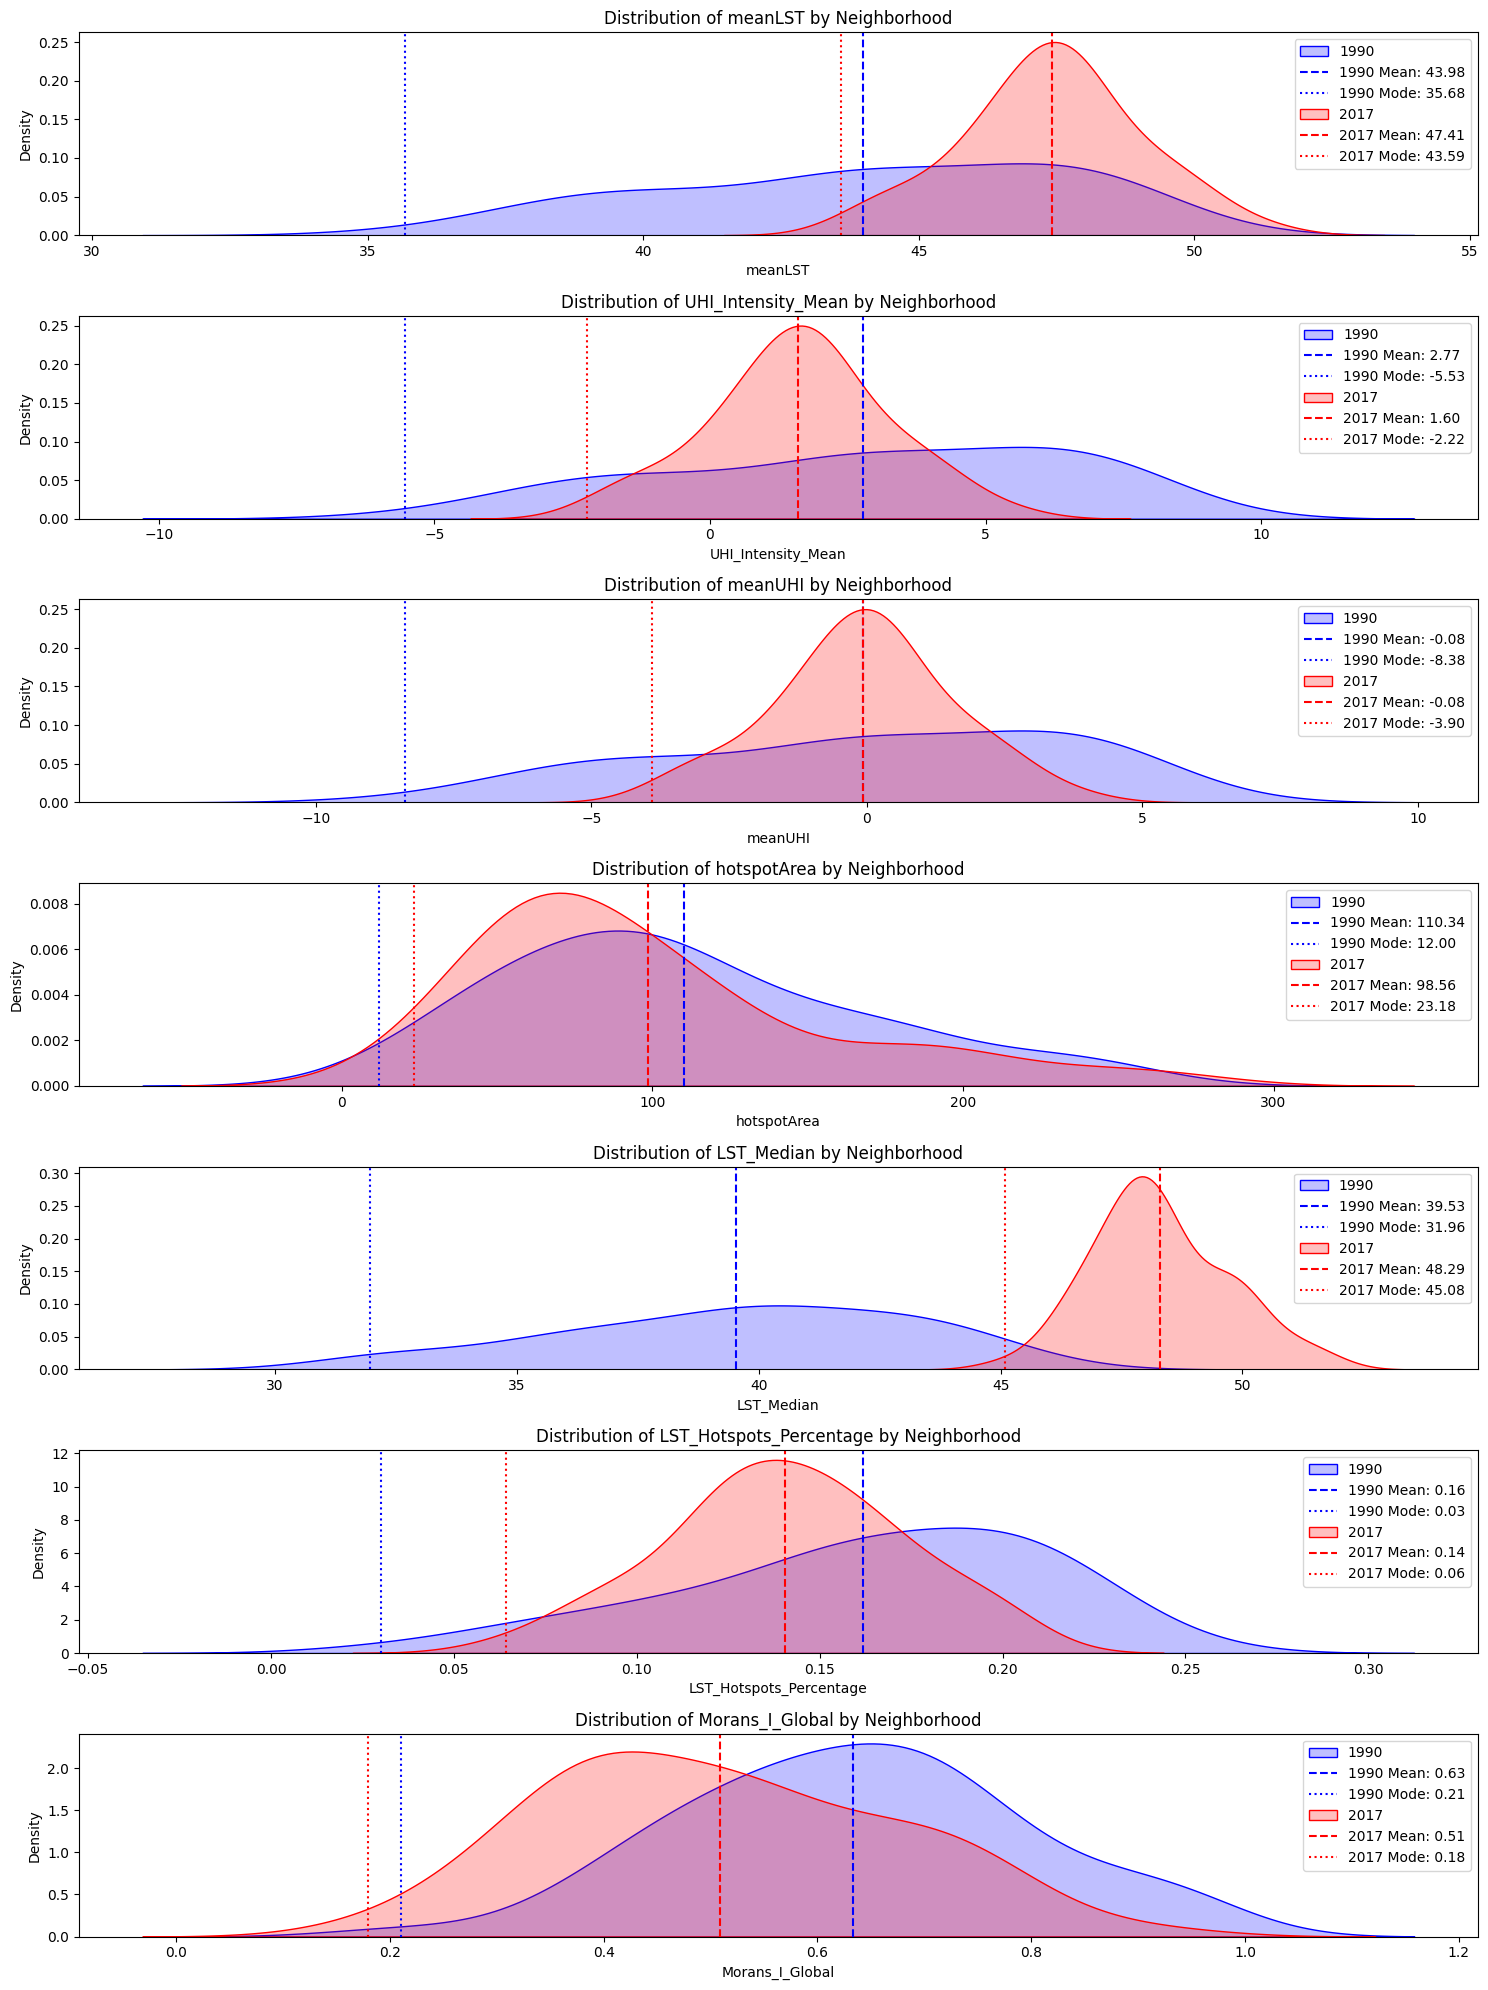

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'meanLST', 'UHI_Intensity_Mean', 'meanUHI', 'hotspotArea',
    'LST_Median', 'LST_Hotspots_Percentage', 'Morans_I_Global'
]

# Set up the matplotlib figure
plt.figure(figsize=(15, 20))

# Loop through the columns to create distribution plots with annotations
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(len(columns_to_plot), 1, i)
    
    # Calculate mode and mean for 1990
    mode_90 = df_90[column].mode()[0]
    mean_90 = df_90[column].mean()
    
    # Calculate mode and mean for 2017
    mode_17 = df_17[column].mode()[0]
    mean_17 = df_17[column].mean()
    
    # Plot distribution for 1990
    sns.kdeplot(df_90[column], label='1990', fill=True, color='blue')  # Updated `shade=True` to `fill=True`
    
    # Add mean and mode annotations for 1990
    plt.axvline(mean_90, color='blue', linestyle='--', label=f'1990 Mean: {mean_90:.2f}')
    plt.axvline(mode_90, color='blue', linestyle=':', label=f'1990 Mode: {mode_90:.2f}')
    
    # Plot distribution for 2017
    sns.kdeplot(df_17[column], label='2017', fill=True, color='red')  # Updated `shade=True` to `fill=True`
    
    # Add mean and mode annotations for 2017
    plt.axvline(mean_17, color='red', linestyle='--', label=f'2017 Mean: {mean_17:.2f}')
    plt.axvline(mode_17, color='red', linestyle=':', label=f'2017 Mode: {mode_17:.2f}')
    
    # Set title and labels
    plt.title(f'Distribution of {column} by Neighborhood')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

def calculate_city_reference_temp(df, column='meanLST'):
    """
    Calculate the reference temperature (mean LST) for the entire city.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing LST data.
        column (str): Column name containing the LST values (default is 'meanLST').
        
    Returns:
        float: The mean LST value for the entire city or NaN if not calculable.
    """
    # Check for missing values in the column
    if df[column].isna().all():
        print(f"All values in column '{column}' are missing.")
        return None
    
    # Calculate the mean value of the specified LST column across the entire DataFrame
    reference_temp = df[column].mean()
    
    return reference_temp

# Example usage of the function
# Assuming df_90 contains data for the year 1990 and df_17 for 2017
reference_temp_1990 = calculate_city_reference_temp(df_90, column='meanLST')
reference_temp_2017 = calculate_city_reference_temp(df_17, column='meanLST')

print(f"City-Wide Reference Temperature in 1990: {reference_temp_1990}")
print(f"City-Wide Reference Temperature in 2017: {reference_temp_2017}")


City-Wide Reference Temperature in 1990: 43.98300107365079
City-Wide Reference Temperature in 2017: 47.41222211349066


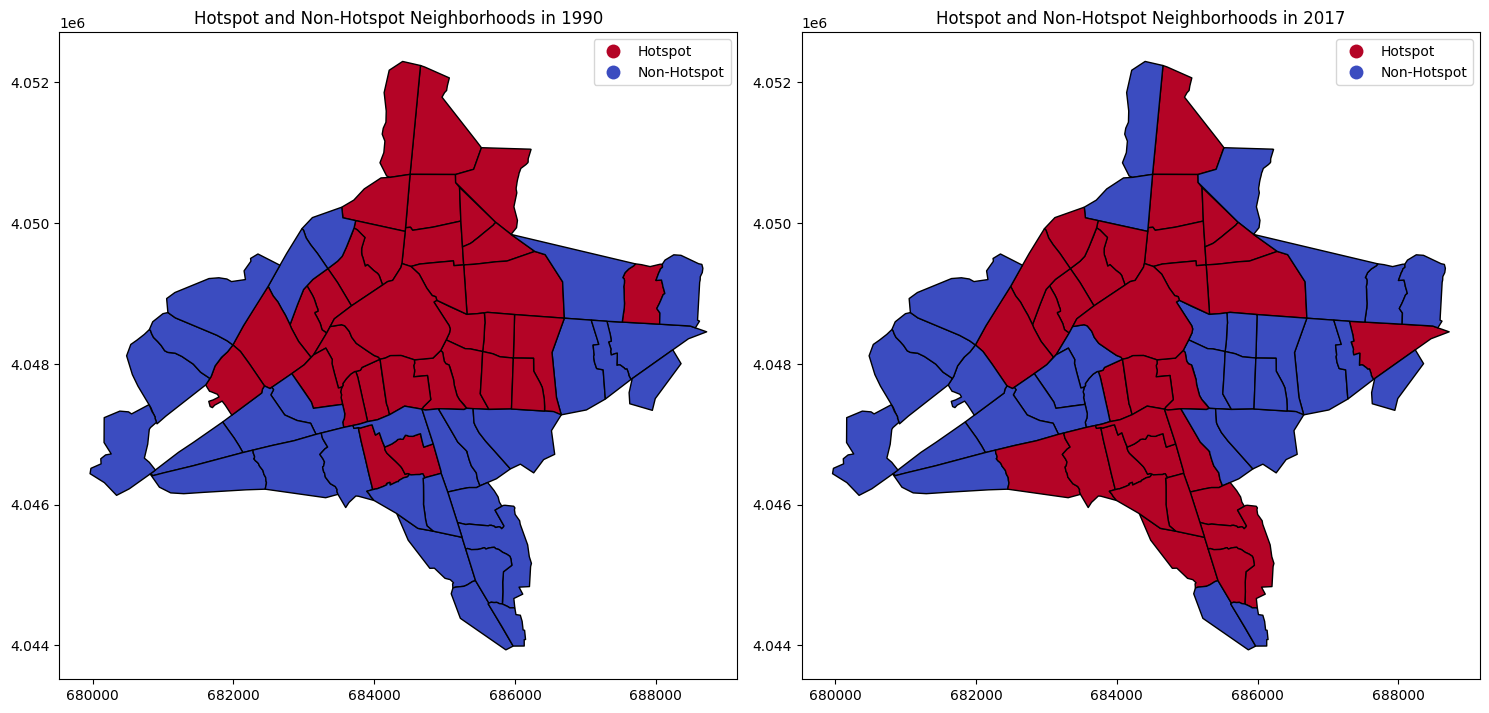

In [5]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile containing neighborhood boundaries
shapefile_path = "neighborhoods.shp"  # Update this with your actual path
gdf = gpd.read_file(shapefile_path)

# Merge the shapefile with the LST and UHI data for 1990 and 2017
gdf_90 = gdf.merge(df_90, on='OBJECTID')
gdf_17 = gdf.merge(df_17, on='OBJECTID')

# Classify neighborhoods as hotspots (UHI > 0) or non-hotspots (UHI ≤ 0)
gdf_90['category'] = gdf_90['meanUHI'].apply(lambda x: 'Hotspot' if x > 0 else 'Non-Hotspot')
gdf_17['category'] = gdf_17['meanUHI'].apply(lambda x: 'Hotspot' if x > 0 else 'Non-Hotspot')

# Plotting the results for 1990
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

gdf_90.plot(column='category', 
            cmap='coolwarm_r', 
            legend=True, 
            ax=ax[0],
            edgecolor='black')
ax[0].set_title('Hotspot and Non-Hotspot Neighborhoods in 1990')

# Plotting the results for 2017
gdf_17.plot(column='category', 
            cmap='coolwarm_r', 
            legend=True, 
            ax=ax[1],
            edgecolor='black')
ax[1].set_title('Hotspot and Non-Hotspot Neighborhoods in 2017')

# Show the plot
plt.tight_layout()
plt.show()


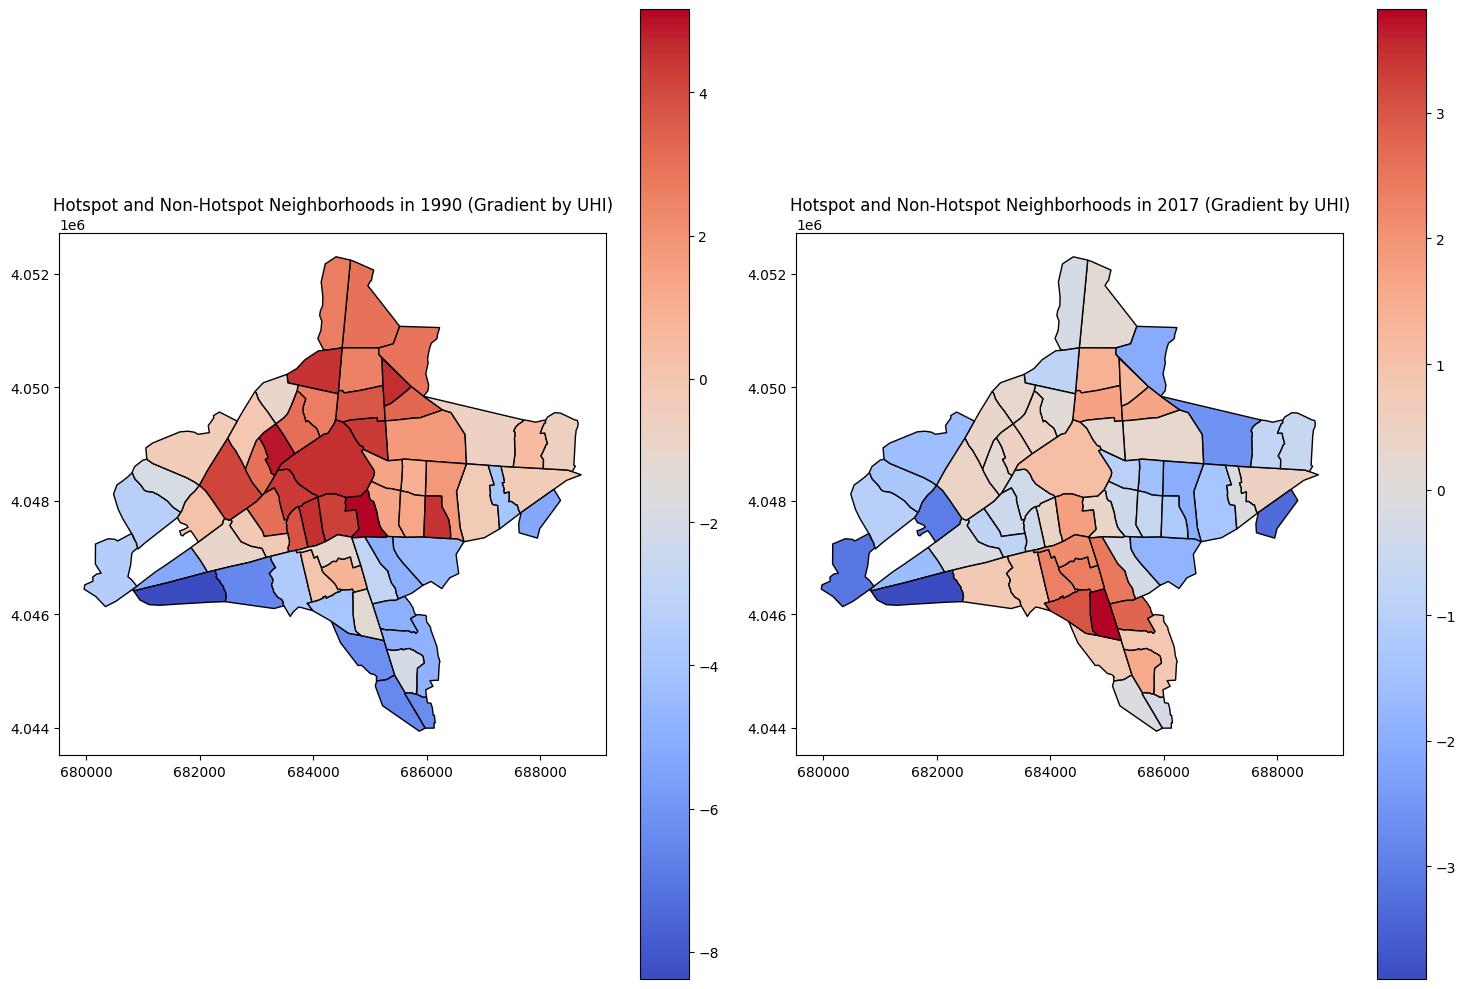

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `gdf_90` and `gdf_17` have already been merged as shown in the previous code

# Plotting the results for 1990 with a gradient based on meanUHI values
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

gdf_90.plot(column='meanUHI', 
            cmap='coolwarm',  # Gradient from blue (cool) to red (warm)
            legend=True, 
            ax=ax[0],
            edgecolor='black')
ax[0].set_title('Hotspot and Non-Hotspot Neighborhoods in 1990 (Gradient by UHI)')

# Plotting the results for 2017 with a gradient based on meanUHI values
gdf_17.plot(column='meanUHI', 
            cmap='coolwarm',  # Gradient from blue (cool) to red (warm)
            legend=True, 
            ax=ax[1],
            edgecolor='black')
ax[1].set_title('Hotspot and Non-Hotspot Neighborhoods in 2017 (Gradient by UHI)')

# Show the plot
plt.tight_layout()
plt.show()


In [11]:
# Filter for neighborhoods that changed categories
switched_to_non_hotspot = gdf_combined[(gdf_combined['category_90'] == 'Hotspot') & 
                                       (gdf_combined['category_17'] == 'Non-Hotspot')].copy()
switched_to_hotspot = gdf_combined[(gdf_combined['category_90'] == 'Non-Hotspot') & 
                                   (gdf_combined['category_17'] == 'Hotspot')].copy()

# Add a column indicating the category switch
switched_to_non_hotspot['switch_type'] = 'Hotspot to Non-Hotspot'
switched_to_hotspot['switch_type'] = 'Non-Hotspot to Hotspot'

# Calculate percentage changes in land covers
landcover_columns = ['0', '1', '2', '3', '4', '5']
for col in landcover_columns:
    switched_to_non_hotspot[f'{col}_change'] = 100 * (switched_to_non_hotspot[f'{col}_17'] - switched_to_non_hotspot[f'{col}_90']) / switched_to_non_hotspot[f'{col}_90']
    switched_to_hotspot[f'{col}_change'] = 100 * (switched_to_hotspot[f'{col}_17'] - switched_to_hotspot[f'{col}_90']) / switched_to_hotspot[f'{col}_90']

# Combine both DataFrames for exporting to CSV
switched_combined = pd.concat([switched_to_non_hotspot, switched_to_hotspot])

# Select the relevant columns for the CSV file
columns_for_csv = ['OBJECTID', 'switch_type'] + [f'{col}_change' for col in landcover_columns]
switched_combined_csv = switched_combined[columns_for_csv]

# Export to CSV
switched_combined_csv.to_csv('neighborhoods_switched_categories.csv', index=False)

# Output a message indicating success
print("CSV file 'neighborhoods_switched_categories.csv' has been created successfully.")


CSV file 'neighborhoods_switched_categories.csv' has been created successfully.


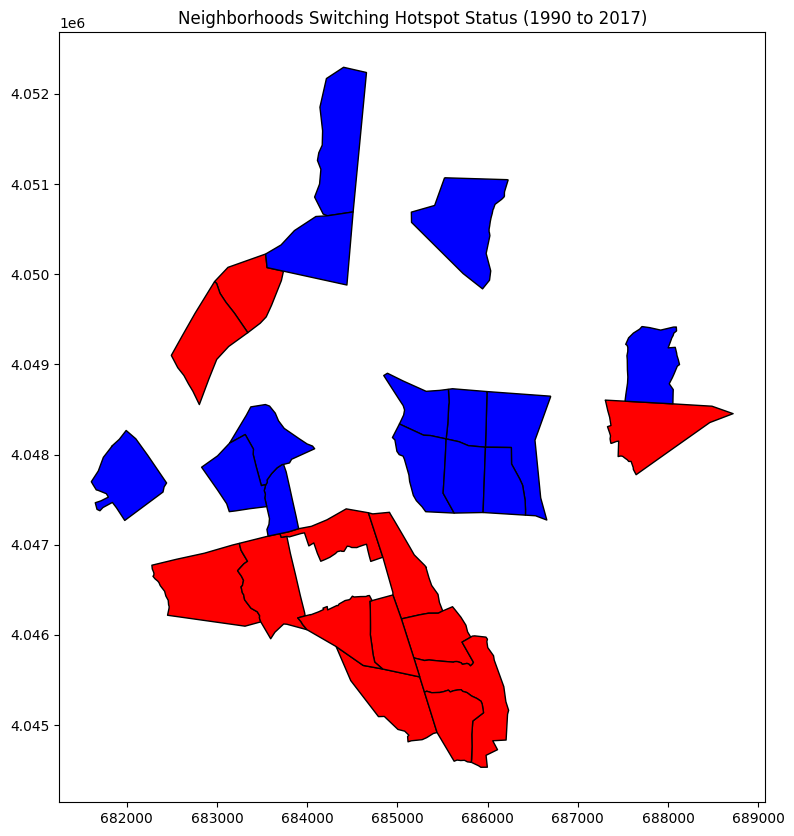

In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile
gdf = gpd.read_file('neighborhoods_sari1.shp')

# Load the CSV file with changes
df_changes = pd.read_csv('neighborhoods_switched_categories.csv')

# Merge the shapefile with the CSV data on the "name" column
gdf = gdf.merge(df_changes, on='OBJECTID', how='inner')

# Define the colors for the switch types
colors = {'Non-Hotspot to Hotspot': 'Red', 'Hotspot to Non-Hotspot': 'Blue'}

# Plot the neighborhoods on the map
fig, ax = plt.subplots(figsize=(12, 10))

for switch_type, color in colors.items():
    gdf_subset = gdf[gdf['switch_type'] == switch_type]
    gdf_subset.plot(ax=ax, color=gdf_subset['switch_type'].map(lambda x: color), legend=True, edgecolor='black')

# Set the title and show the plot
ax.set_title('Neighborhoods Switching Hotspot Status (1990 to 2017)')
plt.show()


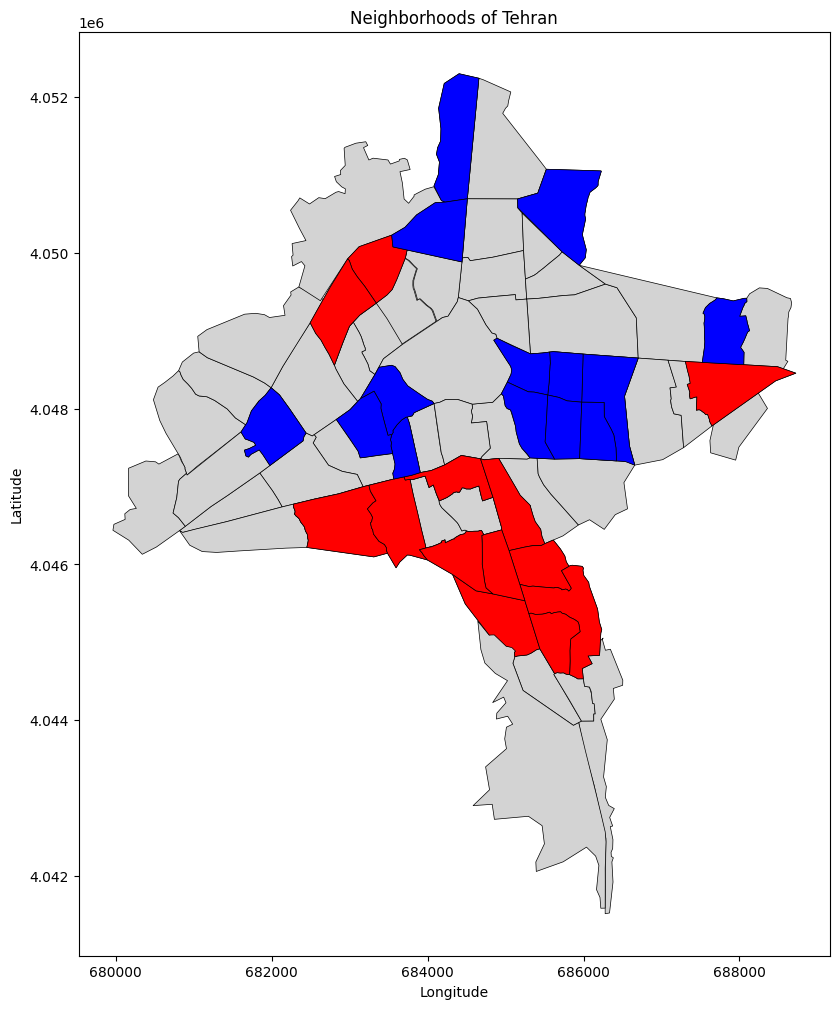

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile
geo_df = gpd.read_file('neighborhoods_sari1.shp')

# Load the CSV file
csv_df = pd.read_csv('neighborhoods_switched_categories.csv')

# Merge the dataframes based on the 'name' column
merged_df = geo_df.merge(csv_df, on='OBJECTID', how='left')

# Create a new column to categorize the neighborhoods
merged_df['category'] = 'Grey'
merged_df.loc[(merged_df['switch_type'] == 'Non-Hotspot to Hotspot'), 'category'] = 'Red'
merged_df.loc[(merged_df['switch_type'] == 'Hotspot to Non-Hotspot'), 'category'] = 'Blue'

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))
geo_df.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
merged_df.loc[merged_df['category'] == 'Red'].plot(ax=ax, color='red', edgecolor='black', linewidth=0.5)
merged_df.loc[merged_df['category'] == 'Blue'].plot(ax=ax, color='blue', edgecolor='black', linewidth=0.5)
ax.set_title('Neighborhoods of Tehran')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

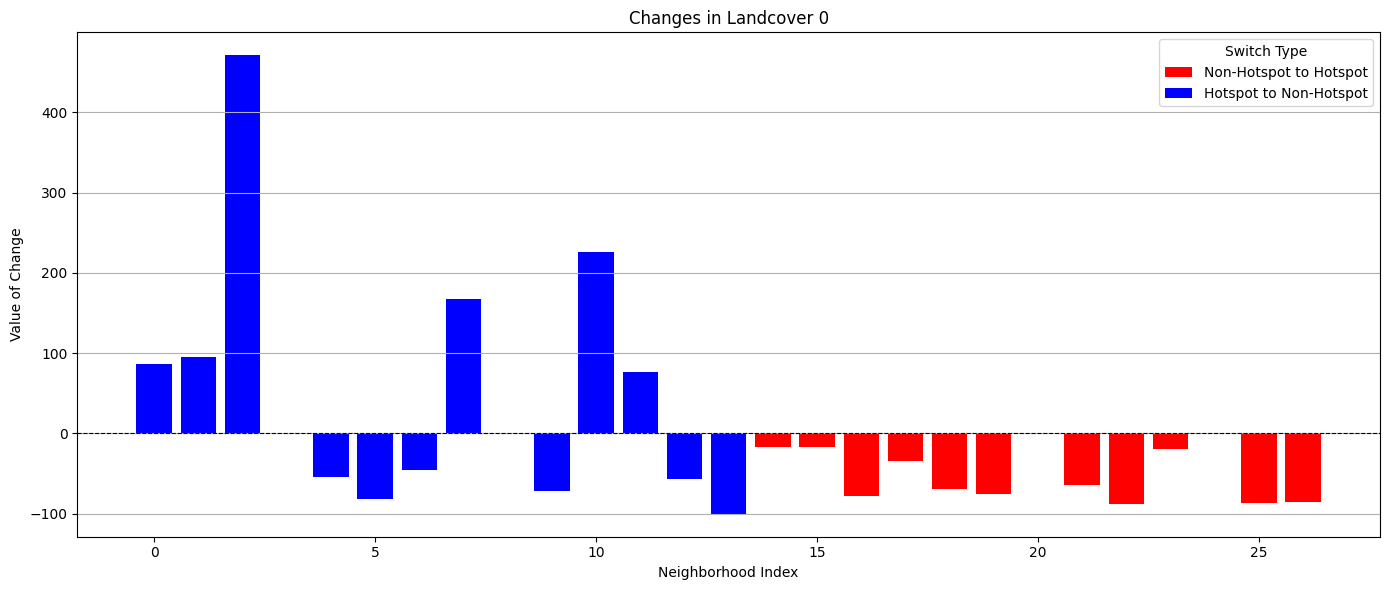

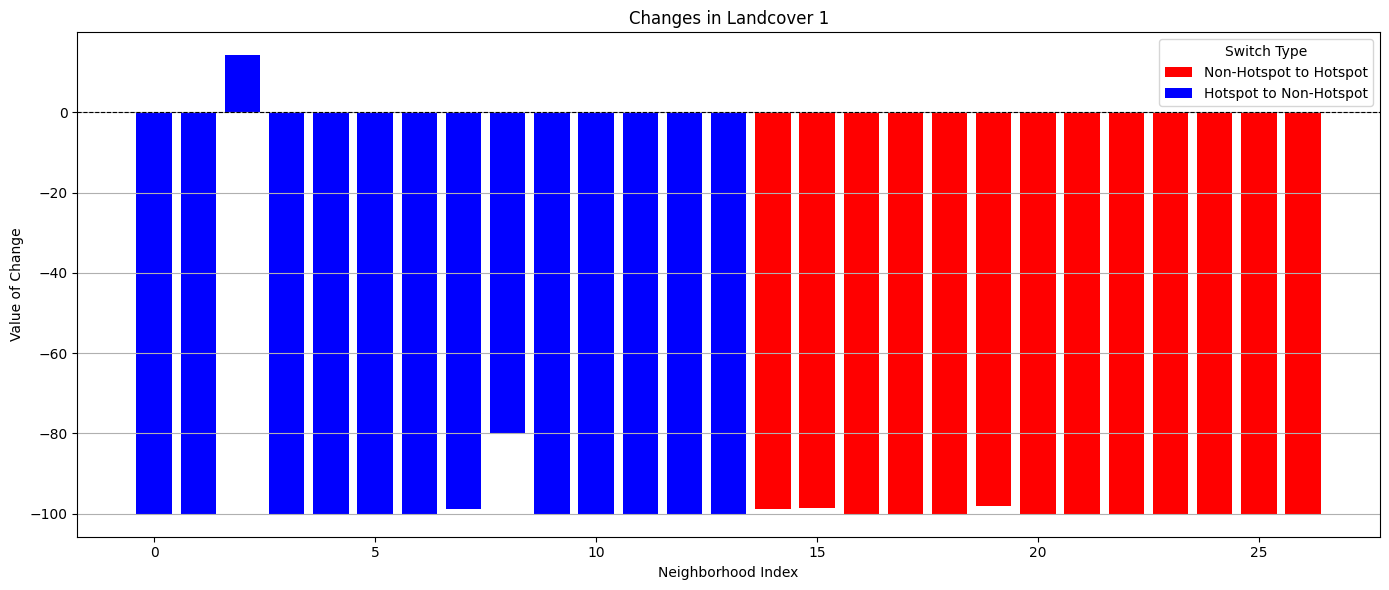

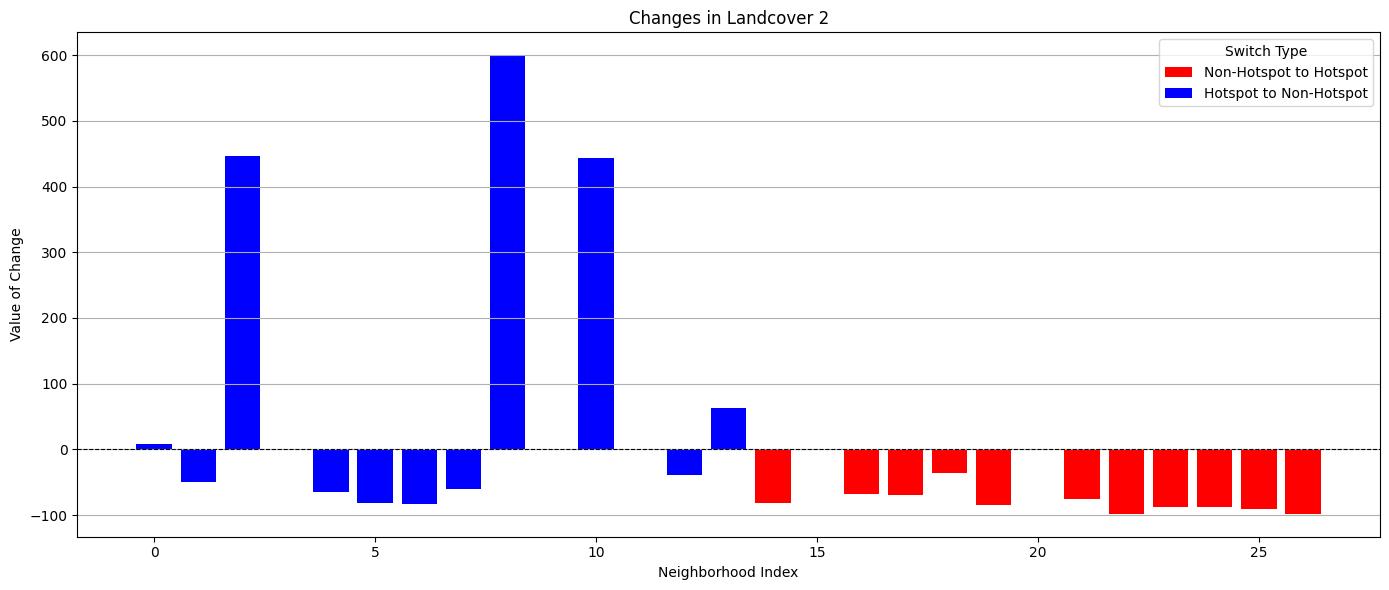

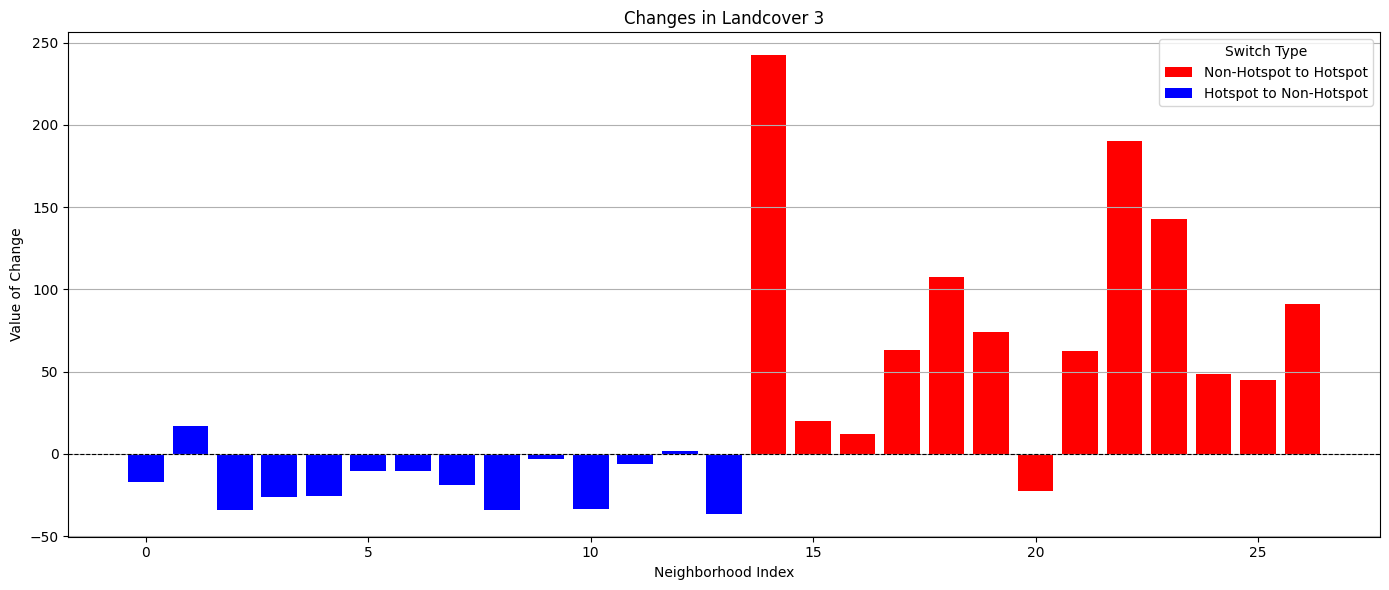

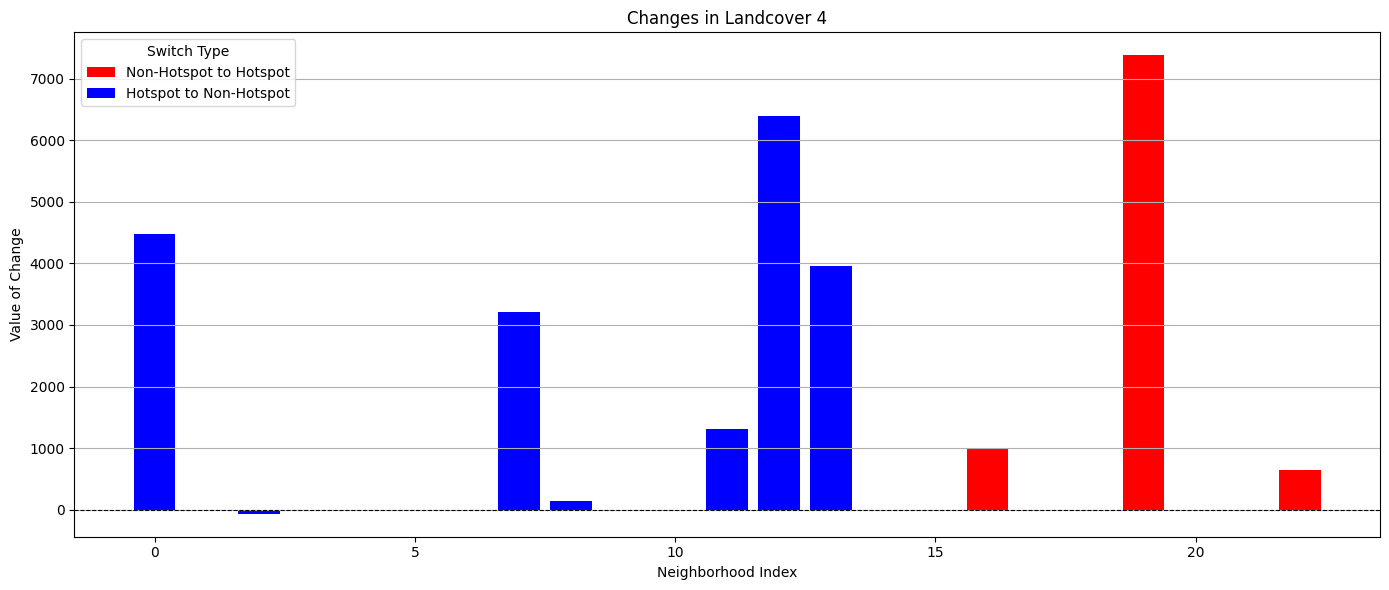

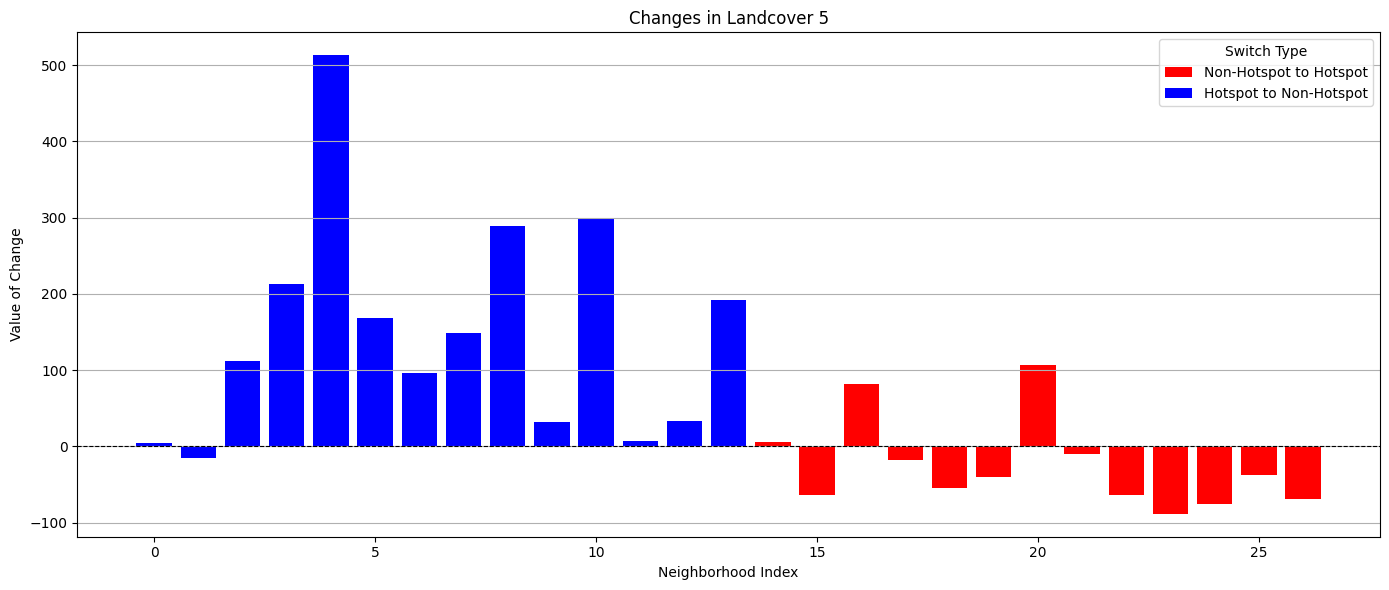

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with changes
df = pd.read_csv('neighborhoods_switched_categories.csv')

# List of landcover columns to plot
landcover_columns = ['0_change', '1_change', '2_change', '3_change', '4_change', '5_change']

# Colors for the switch types
colors = {'Non-Hotspot to Hotspot': 'red', 'Hotspot to Non-Hotspot': 'blue'}

# Create a bar chart for each landcover column
for col in landcover_columns:
    plt.figure(figsize=(14, 6))
    
    # Highlight the zero line
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    
    # Plot bars for each switch type
    for switch_type in colors:
        subset = df[df['switch_type'] == switch_type]
        plt.bar(subset.index, subset[col], color=colors[switch_type], label=switch_type)

    plt.title(f'Changes in Landcover {col.split("_")[0]}')
    plt.xlabel('Neighborhood Index')
    plt.ylabel('Value of Change')
    plt.legend(title='Switch Type')
    plt.grid(True, axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

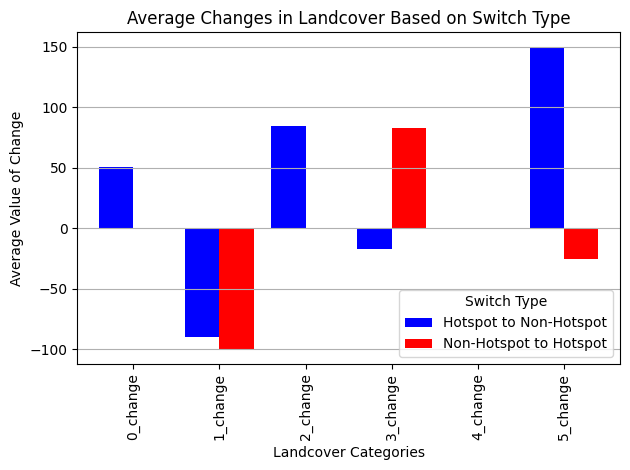

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file with changes
df = pd.read_csv('neighborhoods_switched_categories.csv')

# List of landcover columns to calculate averages
landcover_columns = ['0_change', '1_change', '2_change', '3_change', '4_change', '5_change']

# Calculate the average changes for each switch_type
average_changes = df.groupby('switch_type')[landcover_columns].mean()

# Plotting the average changes
plt.figure(figsize=(10, 6))

# Plot a bar for each landcover category
average_changes.T.plot(kind='bar', color=['blue', 'red'], width=0.8)

# Add titles and labels
plt.title('Average Changes in Landcover Based on Switch Type')
plt.xlabel('Landcover Categories')
plt.ylabel('Average Value of Change')
plt.legend(title='Switch Type')
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

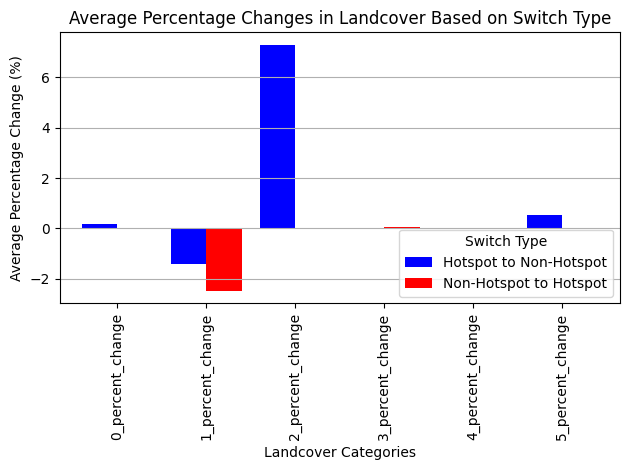

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original landcover data
df_original = pd.read_csv('LcAreaStats_sari90.csv')[['OBJECTID', '0', '1', '2', '3', '4', '5']]

# Load the neighborhoods switched categories data
df_changes = pd.read_csv('neighborhoods_switched_categories.csv')

# Merge the two DataFrames on the 'name' column
df = pd.merge(df_changes, df_original, on='OBJECTID', how='left')

# Calculating percentage changes
for i in range(6):
    original_col = str(i)
    change_col = f'{i}_change'
    df[f'{i}_percent_change'] = (df[change_col] / df[original_col]) * 100

# List of columns with percentage changes
landcover_columns = [f'{i}_percent_change' for i in range(6)]

# Calculate the average percentage changes for each switch_type
average_percent_changes = df.groupby('switch_type')[landcover_columns].mean()

# Plotting the average percentage changes
plt.figure(figsize=(10, 6))

# Plot a bar for each landcover category
average_percent_changes.T.plot(kind='bar', color=['blue', 'red'], width=0.8)

# Add titles and labels
plt.title('Average Percentage Changes in Landcover Based on Switch Type')
plt.xlabel('Landcover Categories')
plt.ylabel('Average Percentage Change (%)')
plt.legend(title='Switch Type')
plt.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


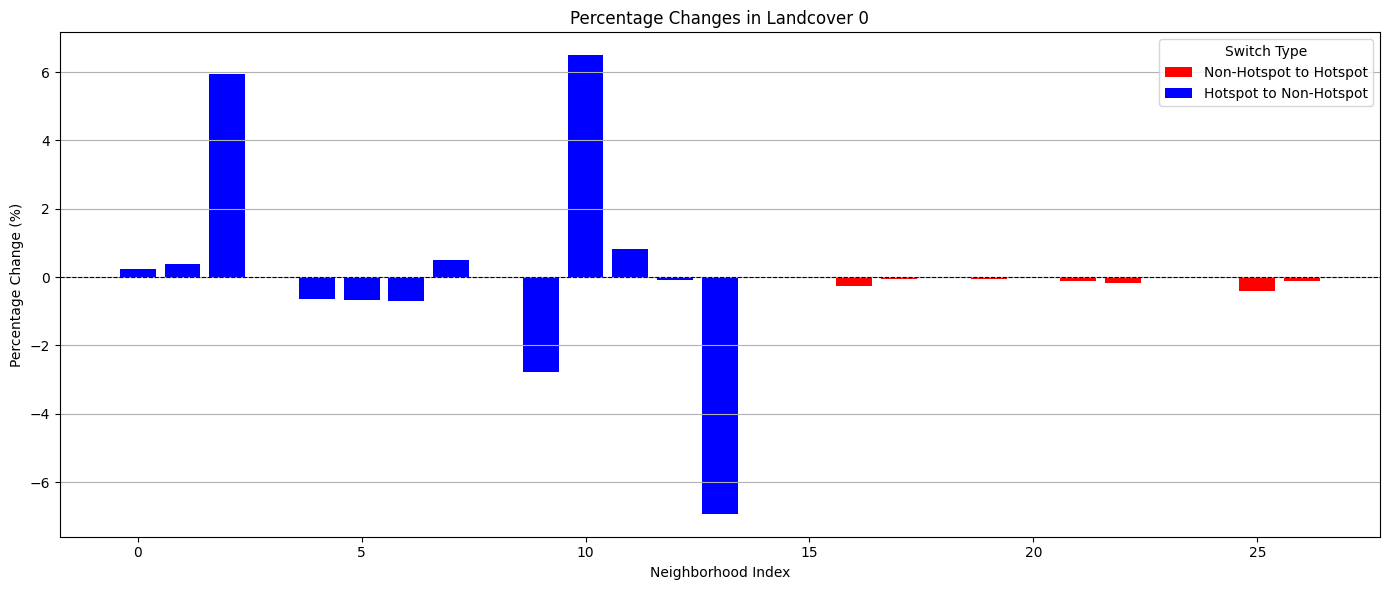

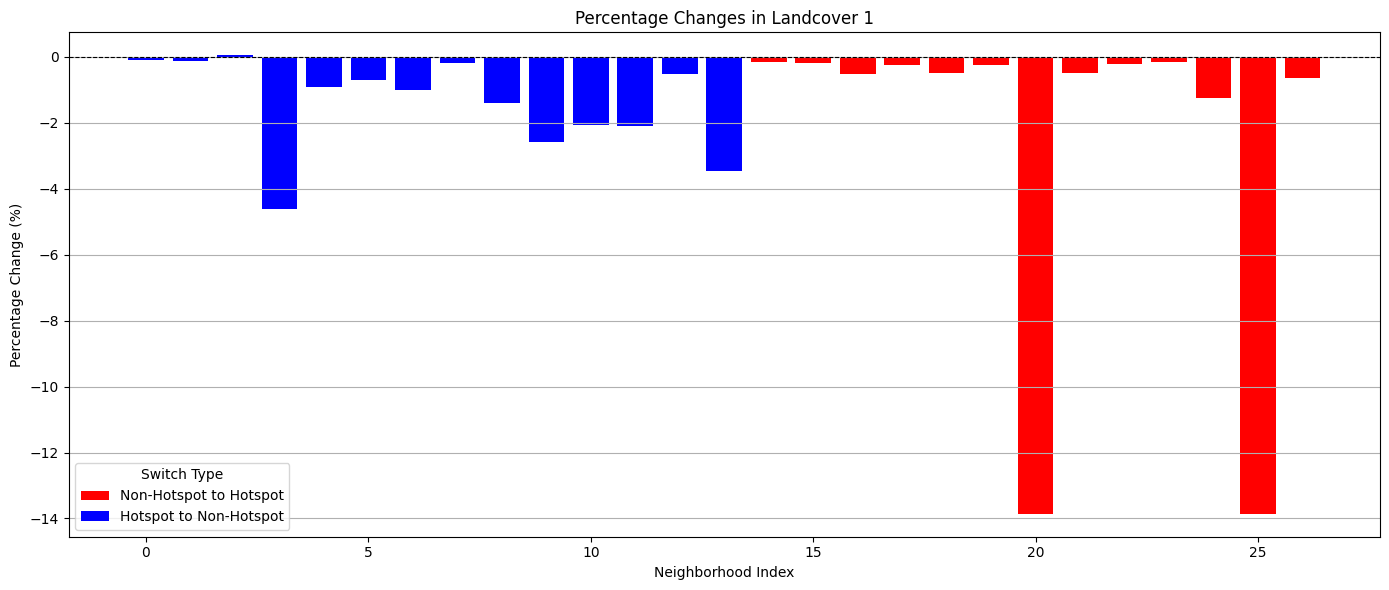

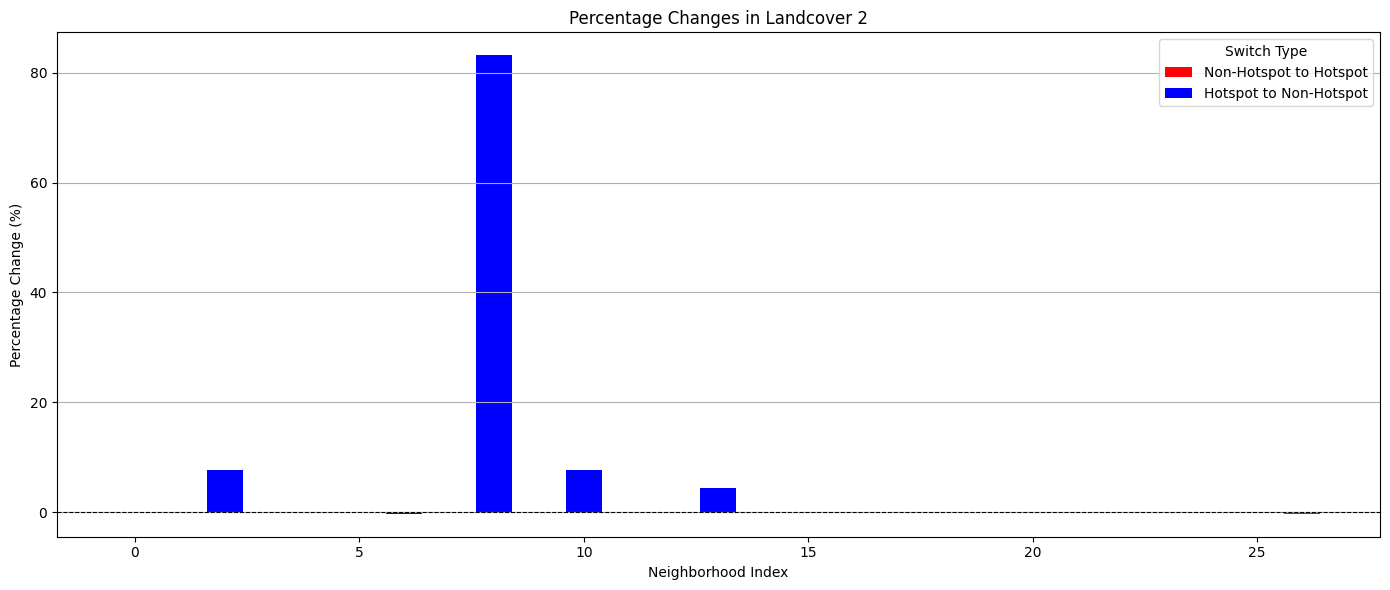

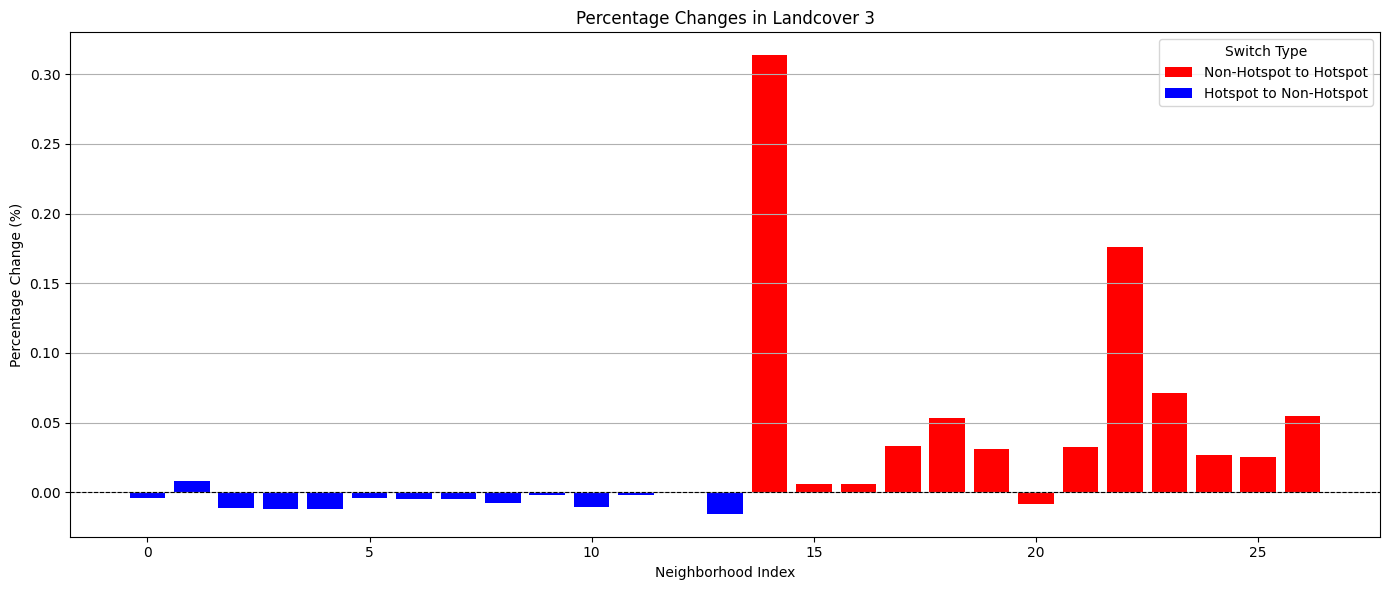

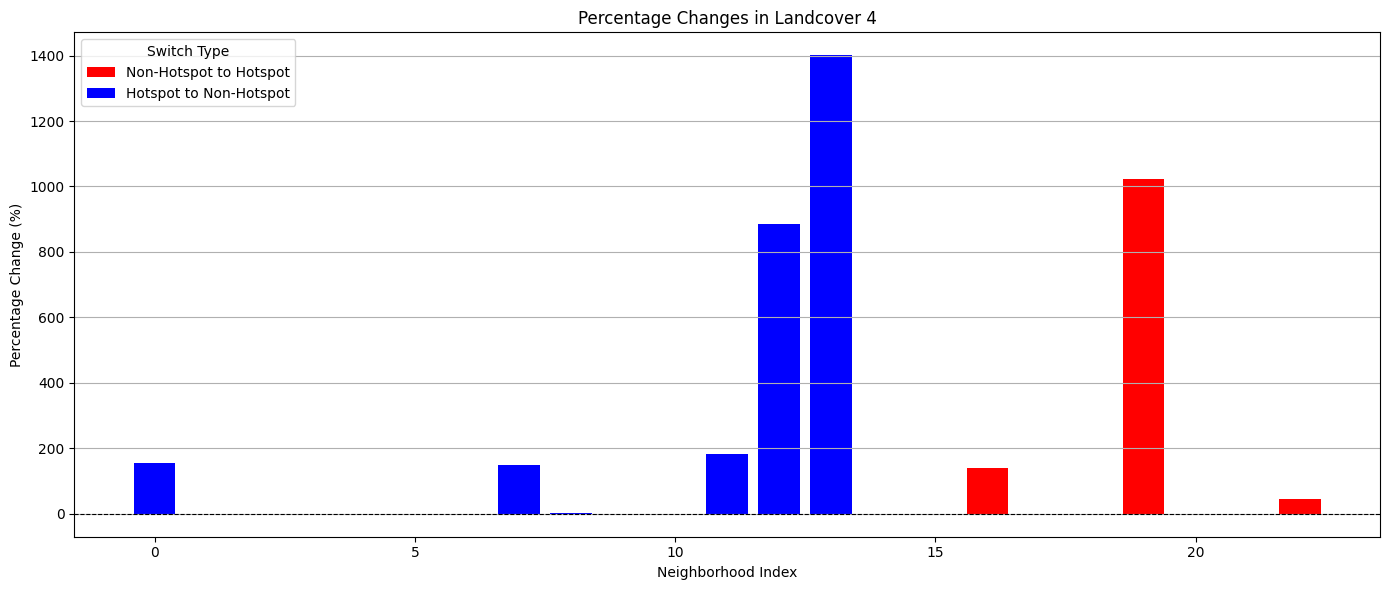

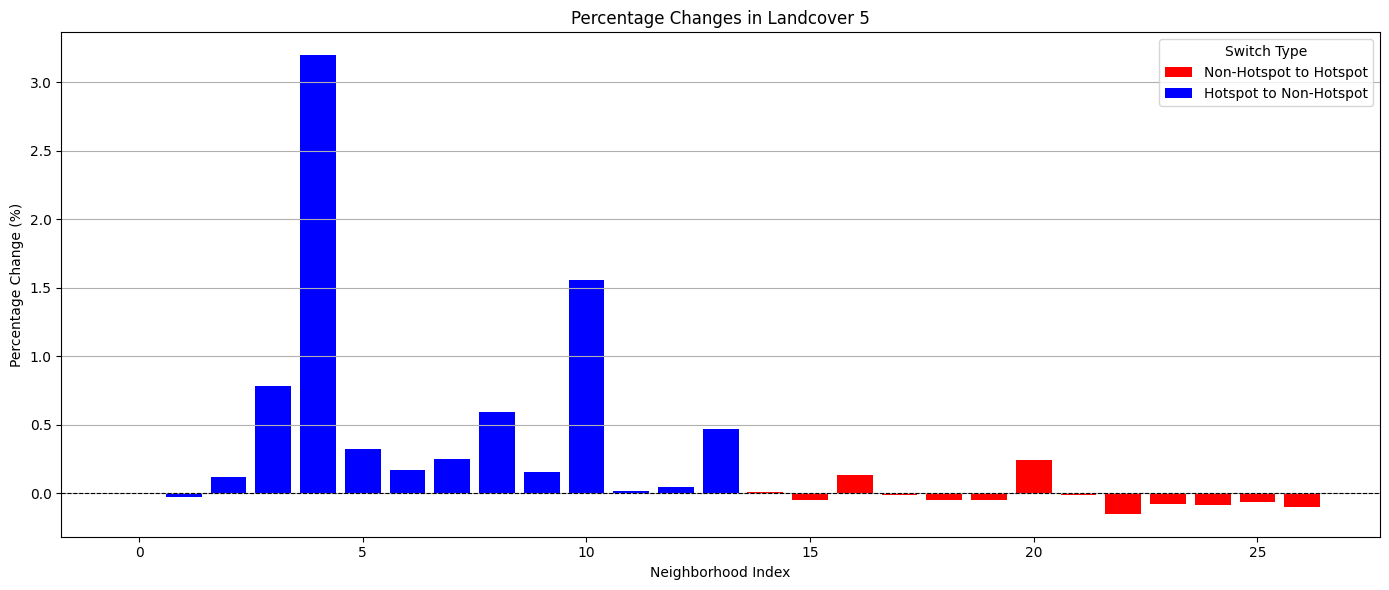

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original landcover data
df_original = pd.read_csv('LcAreaStats_sari90.csv')[['OBJECTID', '0', '1', '2', '3', '4', '5']]

# Load the CSV file with changes
df_changes = pd.read_csv('neighborhoods_switched_categories.csv')

# Merge the two DataFrames on the 'name' column
df = pd.merge(df_changes, df_original, on='OBJECTID', how='left')

# Calculate percentage changes for each landcover type
for i in range(6):
    original_col = str(i)
    change_col = f'{i}_change'
    df[f'{i}_percent_change'] = (df[change_col] / df[original_col]) * 100

# List of landcover columns to plot
landcover_columns = [f'{i}_percent_change' for i in range(6)]

# Colors for the switch types
colors = {'Non-Hotspot to Hotspot': 'red', 'Hotspot to Non-Hotspot': 'blue'}

# Create a bar chart for each landcover column
for col in landcover_columns:
    plt.figure(figsize=(14, 6))
    
    # Highlight the zero line
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    
    # Plot bars for each switch type
    for switch_type in colors:
        subset = df[df['switch_type'] == switch_type]
        plt.bar(subset.index, subset[col], color=colors[switch_type], label=switch_type)

    plt.title(f'Percentage Changes in Landcover {col.split("_")[0]}')
    plt.xlabel('Neighborhood Index')
    plt.ylabel('Percentage Change (%)')
    plt.legend(title='Switch Type')
    plt.grid(True, axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()
